#### Predicing price houses with keras
* Following tutorial: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and checking data

In [3]:
df = pd.read_csv('housepricedata.csv')

In [4]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
df.shape

(1460, 11)

In [6]:
for i in df.columns:
    if df[i].mean() < 1:
        print(df[i].value_counts(), end='-----')

0    913
1    535
2     12
Name: HalfBath, dtype: int64-----0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64-----0    732
1    728
Name: AboveMedianPrice, dtype: int64-----

## Describing and visualizing data

In [7]:
round(df.describe(), 2)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,10516.83,6.10,5.58,1057.43,1.57,0.38,2.87,6.52,0.61,472.98,0.5
std,9981.26,1.38,1.11,438.71,0.55,0.50,0.82,1.63,0.64,213.80,0.5
min,1300.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.0
25%,7553.50,5.00,5.00,795.75,1.00,0.00,2.00,5.00,0.00,334.50,0.0
50%,9478.50,6.00,5.00,991.50,2.00,0.00,3.00,6.00,1.00,480.00,0.0
75%,11601.50,7.00,6.00,1298.25,2.00,1.00,3.00,7.00,1.00,576.00,1.0
max,215245.00,10.00,9.00,6110.00,3.00,2.00,8.00,14.00,3.00,1418.00,1.0


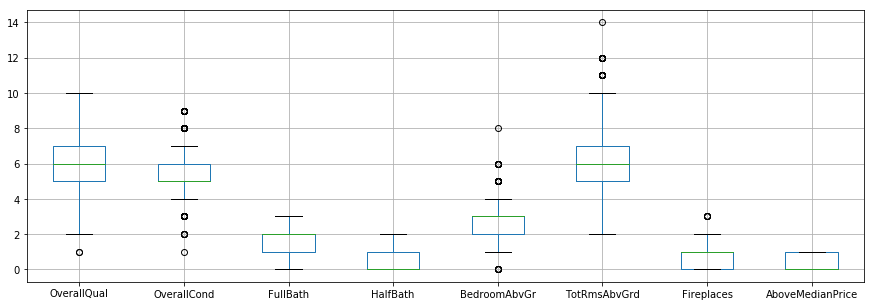

In [8]:
plt.figure(figsize=(15, 5))
df.drop(['LotArea', 'TotalBsmtSF', 'GarageArea'], axis=1).boxplot()

## Splitting data into train and test

In [9]:
# Create X and y variables
dataset = df.values

X = dataset[:, 0:10]
y = dataset[:, 10]

In [10]:
# scale data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, 
                                                                    test_size=0.3)

In [12]:
# split data into validation
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, 
                                                y_val_and_test, 
                                                test_size=0.5,
                                                random_state=42
                                               )

In [13]:
print(X_train.shape, 
      X_val.shape, 
      X_test.shape, 
      y_train.shape, 
      y_val.shape, 
      y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Modeling with Keras - step by step

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [16]:
target = to_categorical(y)

In [17]:
# 1: SPECIFY THE ARCHITECTURE -- REGRESSION

# model = Sequential([
#     Dense(32, activation='relu', input_shape=(10,)),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid'),
# ])

# Instantiate the model
model = Sequential()

model.add(Dense(50, 
                activation='relu', 
                input_shape=(10,)))

# Add a first layer
model.add(Dense(32,
               activation='relu'))

# Add the output layer
model.add(Dense(1))

# 2: COMPILE THE MODEL -- REGRESSION
model.compile(optimizer='adam',
             loss='mean_squared_error')

# 3: FIT THE MODEL
model.fit(X, y,
          batch_size=8,
          epochs=10
#           validation_data=(X_val, Y_val)
         )

# 4: PREDICT
y_pred = model.predict(X)

# 5: EVALUATE
print(model.evaluate(X_test, y_test))

# Calculate the error
print(mean_squared_error(y_pred, y))

# Visualize the evaluation results
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()

# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()

# 6: SAVE AND RELOAD THE MODEL
from keras.models import load_model
model.save('model_file.h5')
my_model = load_model('model_file.h5')
predictions = my_model.predict(X_train)

Epoch 1/10
1460/1460 [==============================] - 1s 477us/step - loss: 15289.2236
Epoch 2/10
1460/1460 [==============================] - 0s 214us/step - loss: 57551.9801
Epoch 3/10
1460/1460 [==============================] - 0s 200us/step - loss: 154.2894
Epoch 4/10
1460/1460 [==============================] - 0s 180us/step - loss: 127.0800
Epoch 5/10
1460/1460 [==============================] - 0s 171us/step - loss: 76.4425
Epoch 6/10
1460/1460 [==============================] - 0s 194us/step - loss: 299.6874
Epoch 7/10
1460/1460 [==============================] - 0s 327us/step - loss: 297.4432
Epoch 8/10
1460/1460 [==============================] - 0s 159us/step - loss: 76.0726
Epoch 9/10
1460/1460 [==============================] - 0s 199us/step - loss: 17.2776
Epoch 10/10
219/219 [==============================] - 0s 147us/step
0.5732971427103156
9.809582421286581


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1632      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,215
Trainable params: 2,215
Non-trainable params: 0
_________________________________________________________________


In [19]:
# # # Compile the model -- classification

# # # Compile the model -- classification
# # model.compile(optimizer='adam',
# #               loss='categorical_crossentropy', # also called log loss
# #               # loss='binary_crossentropy',
# #               # print the 'acc: 0.7789' at the end of each epoch
# #              metrics=['accuracy'])


# model = Sequential()

# model.add(Dense(50, 
#                 activation='relu', 
#                 input_shape=(10,)))

# model.add(Dense(32,
#                activation='relu'))

# # add softmax as an activation from within the output layer
# predictions sum to 1 and so can be interpret the output as probabilities
# model.add(Dense(1, activation='softmax'))

# # Compile the model -- regression
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy', # also called log loss
#               # loss='binary_crossentropy',
#              )

# # Fit the model
# model.fit(X_train, y_train,
#           batch_size=8,
#           epochs=10
# #           validation_data=(X_val, Y_val)
#          )

## Keras NN - function

In [20]:
n_cols = X.shape[1]
input_shape = (n_cols,)

def nn_model(input_shape=input_shape):
    model = Sequential([
        Dense(168, activation='relu', input_shape=input_shape),
        Dense(168, activation='relu'),
        Dense(2, activation='relu')])
    return(model)

In [21]:
def nn_model2(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=input_shape))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2, activation='relu'))
    return(model)

In [22]:
# import optimizer
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

# early callbacks definition
# optimization will automatically stop when it is no longer helpful
early_stop_monitor = EarlyStopping(patience=2)

# list of learning rates
lr_test = [.001, .01, 1]
for lr in lr_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    # import the model
    model1 = nn_model()
    model2 = nn_model2()
    # define optimizer
    my_optimizer = SGD(lr=lr)
    # compile the model
    model1.compile(optimizer=my_optimizer, loss='mean_squared_error')
    model2.compile(optimizer=my_optimizer, loss='mean_squared_error')    
    # fit the model
    model1_fit = model1.fit(X, target, 
              validation_split=3,
              # note that callbacks receives a list
              callbacks=[early_stop_monitor],
              epochs=30
             )
    model2_fit = model2.fit(X, target, 
          validation_split=3,
          # note that callbacks receives a list
          callbacks=[early_stop_monitor],
          epochs=30
         )




Testing model with learning rate: 0.001000

Epoch 1/30
1460/1460 [==============================] - 0s 265us/step - loss: 3188.1527
Epoch 2/30
1460/1460 [==============================] - 0s 57us/step - loss: 0.5000
Epoch 3/30
1460/1460 [==============================] - 0s 57us/step - loss: 0.5000
Epoch 4/30
  32/1460 [..............................] - ETA: 0s - loss: 0.5000

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1460/1460 [==============================] - 0s 72us/step - loss: 0.5000
Epoch 5/30
1460/1460 [==============================] - 0s 51us/step - loss: 0.5000
Epoch 6/30
1460/1460 [==============================] - 0s 54us/step - loss: 0.5000
Epoch 7/30
1460/1460 [==============================] - 0s 64us/step - loss: 0.5000
Epoch 8/30
1460/1460 [==============================] - 0s 59us/step - loss: 0.5000
Epoch 9/30
1460/1460 [==============================] - 0s 56us/step - loss: 0.5000
Epoch 10/30
1460/1460 [==============================] - 0s 56us/step - loss: 0.5000
Epoch 11/30
1460/1460 [==============================] - 0s 57us/step - loss: 0.5000
Epoch 12/30
1460/1460 [==============================] - 0s 60us/step - loss: 0.5000
Epoch 13/30
1460/1460 [==============================] - 0s 58us/step - loss: 0.5000
Epoch 14/30
1460/1460 [==============================] - 0s 54us/step - loss: 0.5000
Epoch 15/30
1460/1460 [==============================] - 0s 66us/step - loss: 0.50

1460/1460 [==============================] - 0s 48us/step - loss: nan
Epoch 11/30
1460/1460 [==============================] - 0s 68us/step - loss: nan
Epoch 12/30
1460/1460 [==============================] - 0s 78us/step - loss: nan
Epoch 13/30
1460/1460 [==============================] - 0s 69us/step - loss: nan
Epoch 14/30
1460/1460 [==============================] - 0s 62us/step - loss: nan
Epoch 15/30
1460/1460 [==============================] - 0s 53us/step - loss: nan
Epoch 16/30
1460/1460 [==============================] - 0s 121us/step - loss: nan
Epoch 17/30
1460/1460 [==============================] - 0s 67us/step - loss: nan
Epoch 18/30
1460/1460 [==============================] - 0s 66us/step - loss: nan
Epoch 19/30
1460/1460 [==============================] - 0s 71us/step - loss: nan
Epoch 20/30
1460/1460 [==============================] - 0s 65us/step - loss: nan
Epoch 21/30
1460/1460 [==============================] - 0s 61us/step - loss: nan
Epoch 22/30
1460/1460 [====

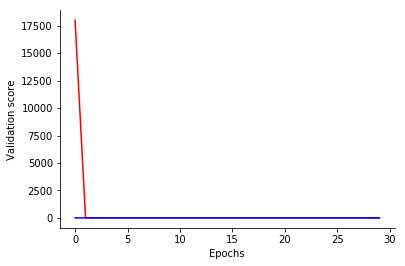

In [23]:
# Create the plot
plt.plot(model1_fit.history['loss'], 'r', model2_fit.history['loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
sns.despine();